In [1]:
'''
* 머신러닝의 개념
- 기계(machine) 스스로 데이터를 학습하여 서로 다른 변수 간의 관계를 찾아 나가는 과정이라 할 수 있으며,
예측(prediction), 분류(classification), 군집(clustering) 알고리즘 등으로 분류됨.
- 정답 데이터를 가지고 학습에 활용하면 지도학습(supervised learning), 정답 데이터 없이 컴퓨터 알고리즘
스스로 데이터로부터 숨은 패턴을 찾아내면 비지도학습(unsupervised learning)이라고 함.
- 머신러닝 프로세스
1. 데이터 정리
2. 데이터 분리(훈련/검증)
3. 알고리즘 준비
4. 모형학습(훈련데이터)
5. 예측(검증데이터)
6. 모형평가(confusion matrix+α)
7. 모형활용
'''
# 필요 패키지 설치
!pip install numpy
!pip install pandas
!pip install scikit-learn
!pip install scipy

# 경고메세지 제거
import warnings
warnings.filterwarnings(action='ignore')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# 단순회귀분석(Simple Linear Regression) : 2개의 변수 사이의 확률적, 통계적 상관성을 찾는 알고리즘
# 필요 패키지 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

# 필요 데이터셋 불러오기
df = sns.load_dataset('mpg')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [3]:
# 데이터 기초통계정보 확인
df.describe()

mpg   cylinders  displacement  horsepower       weight  \
count  398.000000  398.000000    398.000000  392.000000   398.000000   
mean    23.514573    5.454774    193.425879  104.469388  2970.424623   
std      7.815984    1.701004    104.269838   38.491160   846.841774   
min      9.000000    3.000000     68.000000   46.000000  1613.000000   
25%     17.500000    4.000000    104.250000   75.000000  2223.750000   
50%     23.000000    4.000000    148.500000   93.500000  2803.500000   
75%     29.000000    8.000000    262.000000  126.000000  3608.000000   
max     46.600000    8.000000    455.000000  230.000000  5140.000000   

       acceleration  model_year  
count    398.000000  398.000000  
mean      15.568090   76.010050  
std        2.757689    3.697627  
min        8.000000   70.000000  
25%       13.825000   73.000000  
50%       15.500000   76.000000  
75%       17.175000   79.000000  
max       24.800000   82.000000

In [4]:
# 누락데이터 수 체크
print(df.isnull().sum(), len(df), sep='\n')

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64
398


In [5]:
# 누락데이터 삭제 후 재확인
df.dropna(subset=['horsepower'], inplace=True)
print(df.isnull().sum(), len(df), sep='\n')

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64
392


<Axes: xlabel='weight', ylabel='mpg'>

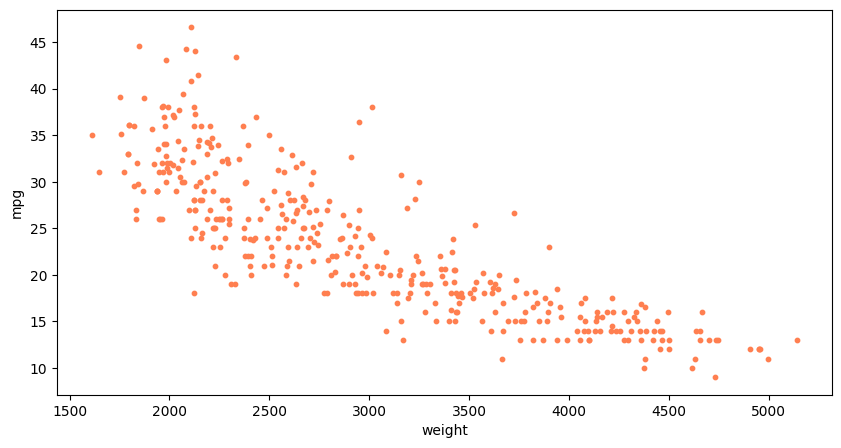

In [6]:
# 두 매개 변수에 대한 산점도 그리기 - Pandas
df.plot(kind='scatter', x='weight', y='mpg', c='coral', s=10, figsize=(10, 5))

<Axes: xlabel='weight', ylabel='mpg'>

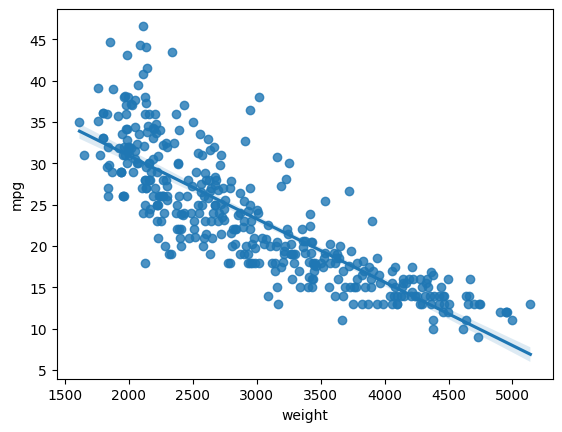

In [7]:
# 두 매개변수에 대한 산점도 그리기 - seaborn
sns.regplot(x='weight', y='mpg', data=df) # 회귀선 미표시

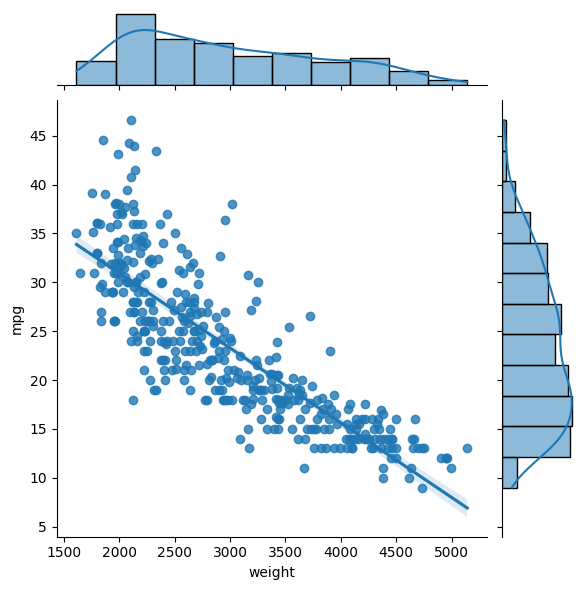

In [8]:
sns.jointplot(x='weight', y='mpg', data=df, kind='reg') # 회귀선 표시

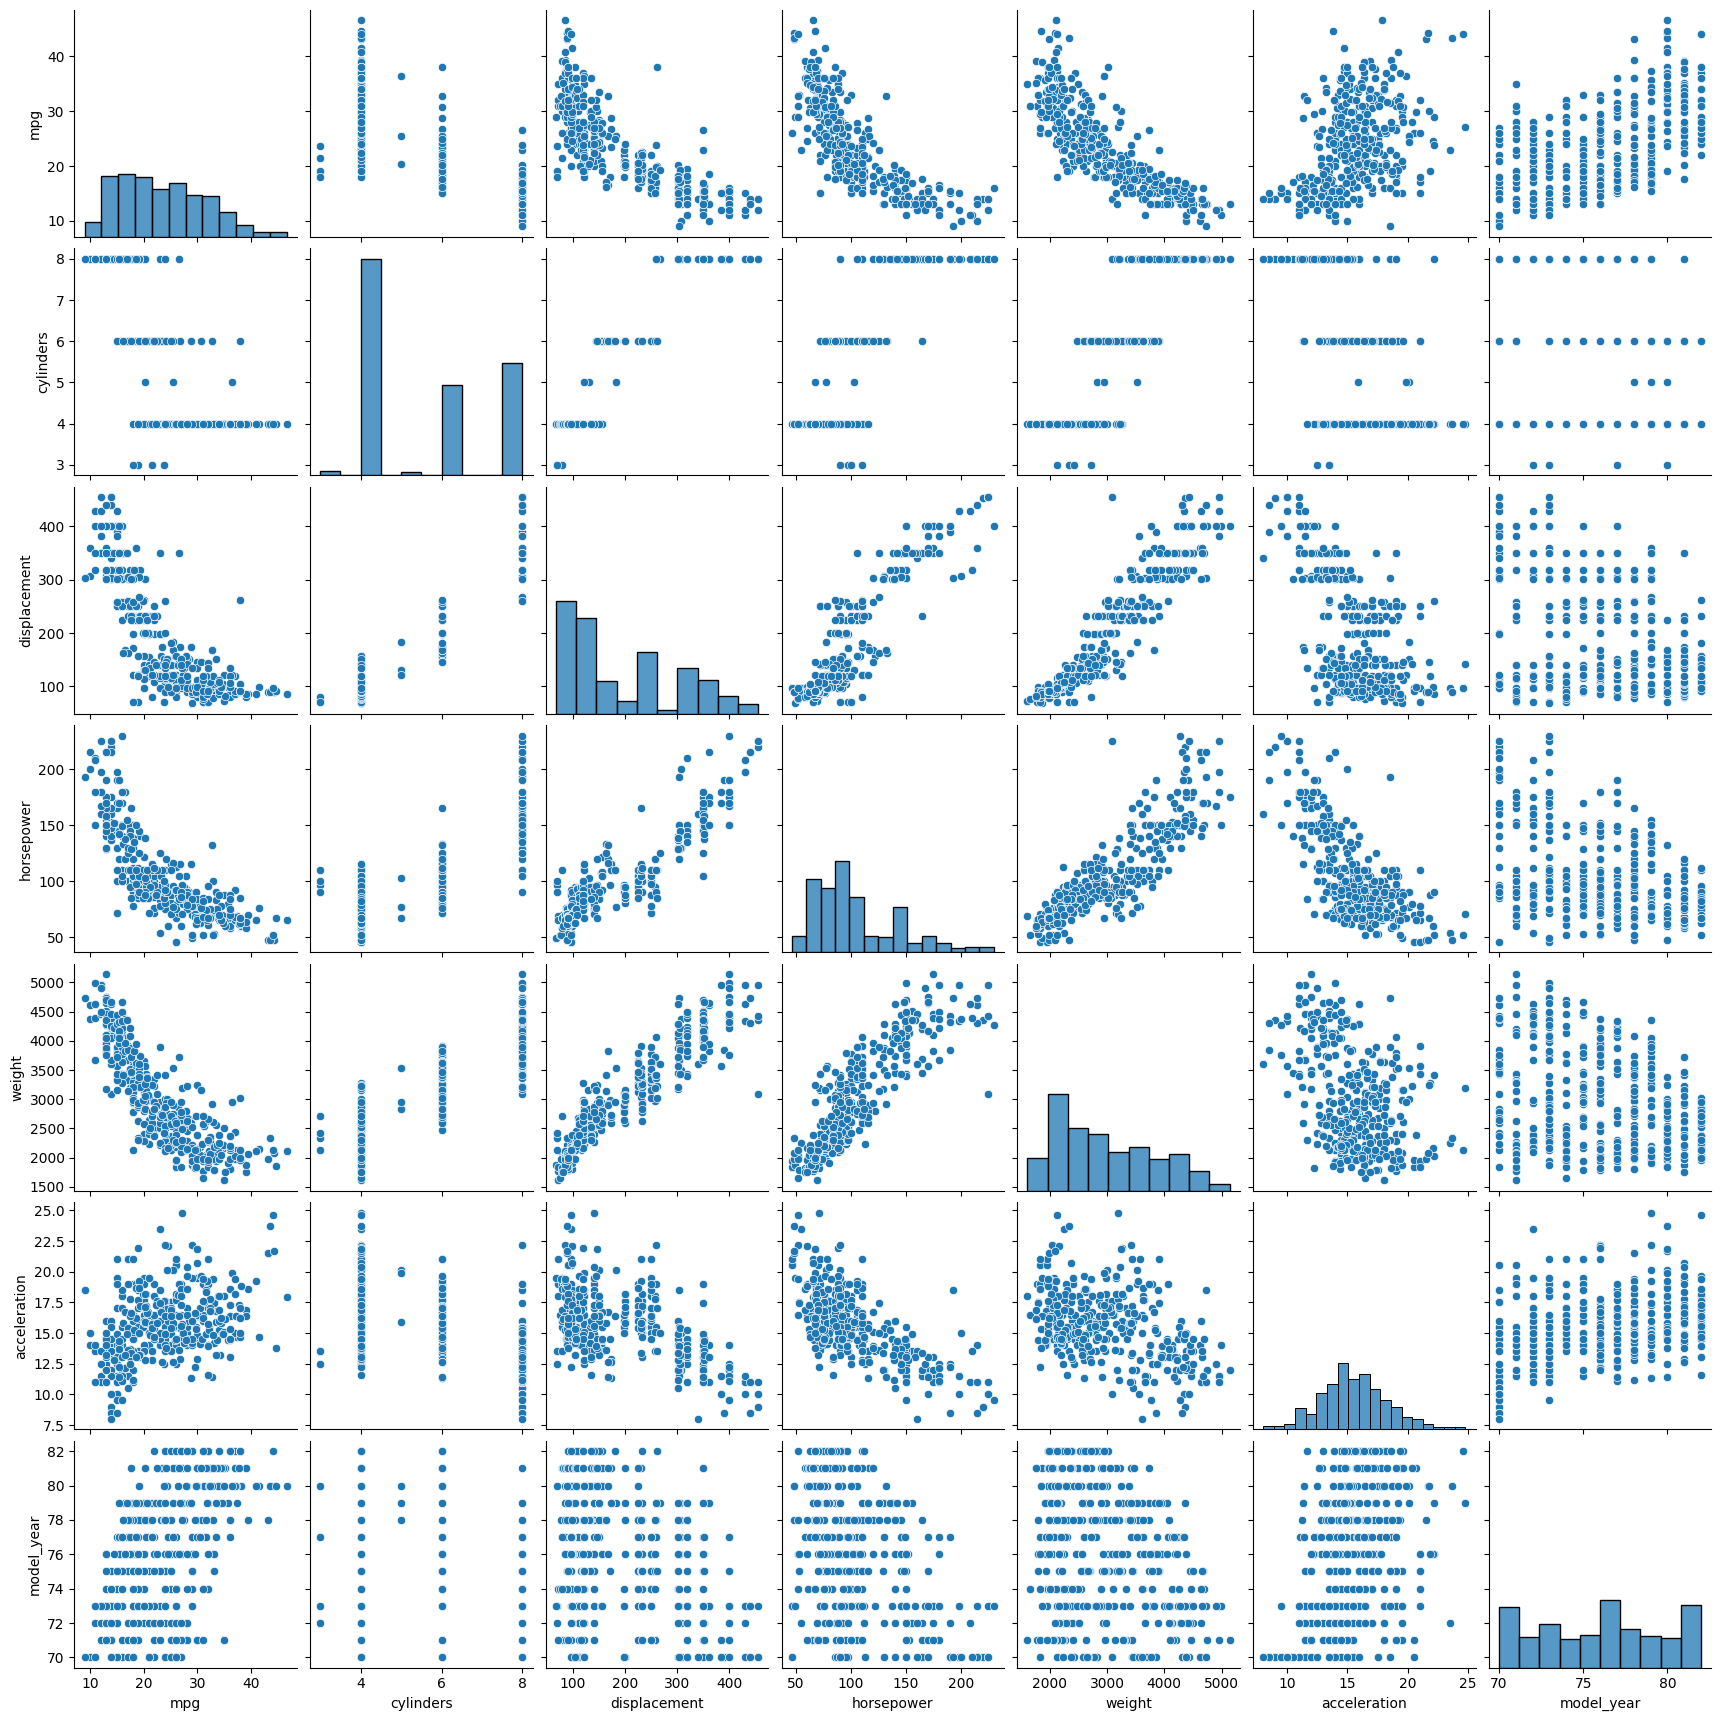

In [9]:
# 모든 변수들에 대한 산점도 그리기
sns.pairplot(df, height=2.5, aspect=1)

In [22]:
# 독립/종속 변수 선택
X = df[['weight']]
y = df['mpg']

# 훈련/종속 데이터 분할
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.3, random_state=10)
print(len(X_train), len(X_test), sep=' / ')

274 / 118


In [25]:
# sklearn에서 선형회귀분석 모듈 가져오기
lr = sklearn.linear_model.LinearRegression()

# 모델 학습 시키기
lr.fit(X_train, y_train)

# 학습시킨 모델의 결정계수 계산
r_square = lr.score(X_test, y_test)
print(r_square)

0.6822458558299322


In [26]:
# 회귀식의 내용 확인
print(f'기울기 : {lr.coef_}\ny절편 : {lr.intercept_}')

기울기 : [-0.00775343]
y절편 : 46.7103662572801


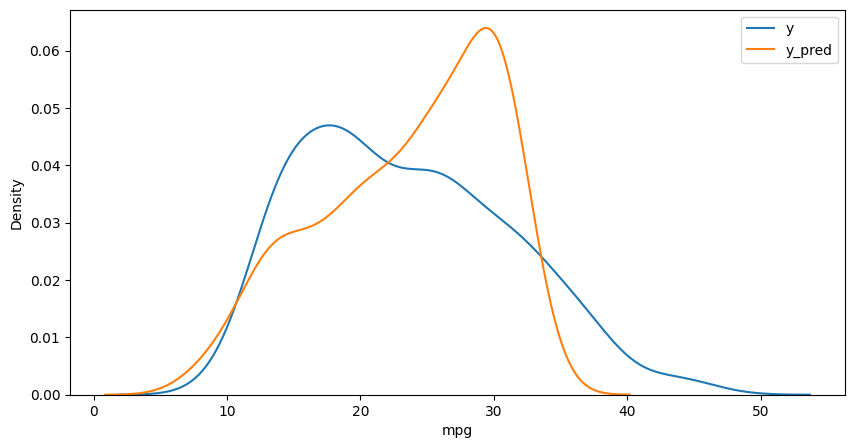

In [27]:
# 실제 값과 예측값의 차이 확인
y_hat = lr.predict(X)

plt.figure(figsize=(10, 5))
ax1 = sns.kdeplot(y, label='y')
ax2 = sns.kdeplot(y_hat, label='y_pred')
plt.legend()
plt.show()

In [28]:
# 다항 회귀분석(Ploynomial Regression) : 2차 함수 이상의 다항 함수를 이용하여 두 변수간의 선형관계를 설명하는 알고리즘
# 데이터 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    object 
 8   name          392 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 30.6+ KB


In [29]:
# train, test data 분리
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(df[['weight']], df['mpg'], test_size=0.3, random_state=10)

print(f'훈련 데이터 : {X_train.shape}\n검증 데이터 : {X_test.shape}')

훈련 데이터 : (274, 1)
검증 데이터 : (118, 1)


In [30]:
# 데이터 변형을 위한 함수 로드
poly = sklearn.preprocessing.PolynomialFeatures(degree=2) # 2차항 적용
X_train_poly = poly.fit_transform(X_train) # X_train data를 2차항으로 적용

print(f'원 데이터 : {X_train.shape}\n2차항 변환 데이터 : {X_train_poly.shape}')

원 데이터 : (274, 1)
2차항 변환 데이터 : (274, 3)


In [31]:
# 모델로드 후 학습
pr = sklearn.linear_model.LinearRegression()
pr.fit(X_train_poly, y_train)

# 테스트 데이터로 결정계수 계산
X_test_poly = poly.fit_transform(X_test)
r_square = pr.score(X_test_poly, y_test)
print(r_square)

0.708700926297548


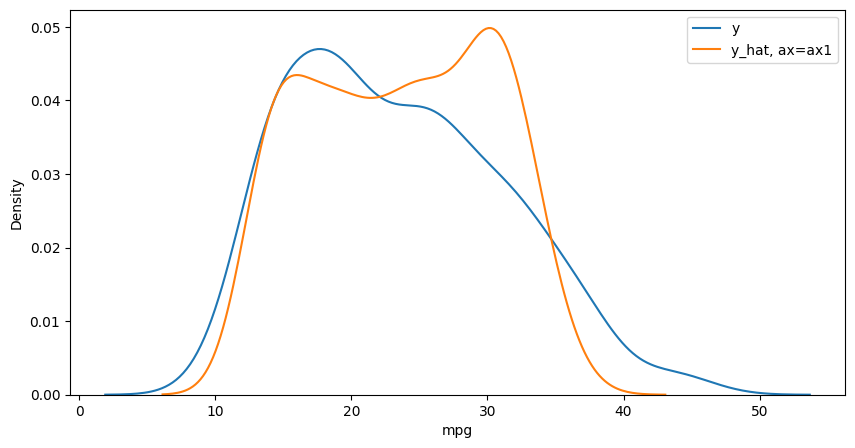

In [32]:
# 분석 결과 시각화
X_poly = poly.fit_transform(X)
y_hat = pr.predict(X_poly)

plt.figure(figsize=(10, 5))
ax1 = sns.kdeplot(y, label='y')
ax2 = sns.kdeplot(y_hat, label='y_hat, ax=ax1')
plt.legend()
plt.show()

In [33]:
# 다중회귀분석(Multivariate Regression) : 2개 이상의 독립변수들이 종속변수에 미치는 영향을 확인하기 위해 사용하는 알고리즘
# 훈련, 검증 데이터 분할
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(df[['cylinders', 'horsepower', 'weight']], df['mpg'], test_size=0.3, random_state=10)

print(f'훈련 데이터 : {X_train.shape}\n검증 데이터 : {X_test.shape}')

훈련 데이터 : (274, 3)
검증 데이터 : (118, 3)


In [34]:
# 모델 로드 후 학습
lr = sklearn.linear_model.LinearRegression()
lr.fit(X_train, y_train)

# 결과 확인
r_square = lr.score(X_test, y_test)
print(f'결정계수 : {r_square}\n\nX변수의 계수 : {lr.coef_}\n\n상수항 : {lr.intercept_}')

결정계수 : 0.6939048496695599

X변수의 계수 : [-0.60691288 -0.03714088 -0.00522268]

상수항 : 46.414351269634025


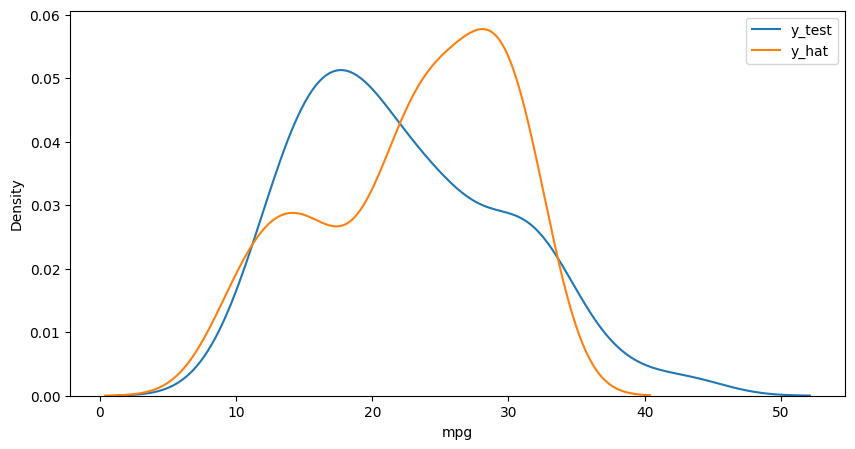

In [35]:
# 결과 시각화
y_hat = lr.predict(X_test)

plt.figure(figsize=(10, 5))
ax1 = sns.kdeplot(y_test, label='y_test')
ax2 = sns.kdeplot(y_hat, label='y_hat', ax=ax1)
plt.legend()
plt.show()

In [36]:
# 분류 모델
# KNN(K-Nearest-Neigbors) : k개의 가장 가까운 이웃으로 집단을 구성하는 알고리즘으로 k값에 따라 정확도다 상이함.
df_titanic = sns.load_dataset('titanic')

# 데이터 살펴보기
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [37]:
df_titanic.describe()

survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200

In [38]:
# 불필요 컬럼 삭제
rdf = df_titanic.drop(['deck', 'embark_town'],  axis=1)

# 나이데이터가 NaN인 모든 행 삭제
rdf = rdf.dropna(subset=['age'], how='any', axis=0)
print(f'{rdf.isnull().sum()}\n\n행의 길이 : {len(rdf)}')

survived      0
pclass        0
sex           0
age           0
sibsp         0
parch         0
fare          0
embarked      2
class         0
who           0
adult_male    0
alive         0
alone         0
dtype: int64

행의 길이 : 714


In [39]:
# embarked NaN값 처리
most_freq = rdf['embarked'].value_counts(dropna=True).idxmax()

rdf['embarked'].fillna(most_freq, inplace=True)
print(f'{rdf.isnull().sum()}\n\n행의 길이 : {len(rdf)} / embarked 컬럼의 최대값 : {most_freq}')

survived      0
pclass        0
sex           0
age           0
sibsp         0
parch         0
fare          0
embarked      0
class         0
who           0
adult_male    0
alive         0
alone         0
dtype: int64

행의 길이 : 714 / embarked 컬럼의 최대값 : S


In [40]:
# 분석에 사용할 열 분리
ndf = rdf[['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'embarked']]

# embarked, sex열 원핫인코딩
onehot_sex = pd.get_dummies(ndf['sex'])
onehot_embarked = pd.get_dummies(ndf['embarked'], prefix='town')

ndf = pd.concat([ndf, onehot_sex], axis=1)
ndf = pd.concat([ndf, onehot_embarked], axis=1)

ndf.drop(['sex', 'embarked'], axis=1, inplace=True)
print(ndf.head())

   survived  pclass   age  sibsp  parch  female  male  town_C  town_Q  town_S
0         0       3  22.0      1      0       0     1       0       0       1
1         1       1  38.0      1      0       1     0       1       0       0
2         1       3  26.0      0      0       1     0       0       0       1
3         1       1  35.0      1      0       1     0       0       0       1
4         0       3  35.0      0      0       0     1       0       0       1


In [41]:
# X, y변수 분할
X = ndf[['pclass', 'age', 'sibsp', 'parch', 'female', 'male', 'town_C', 'town_Q', 'town_S']]
y = ndf['survived']

# 설명변수 데이터 정규화
X = sklearn.preprocessing.StandardScaler().fit(X).transform(X)

# 훈련, 검증 데이터 분할
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.3, random_state=10)

print(f'훈련 데이터 : {X_train.shape}\n검증 데이터 : {y_train.shape}')

훈련 데이터 : (499, 9)
검증 데이터 : (499,)


In [48]:
# 모델 로드 후 학습
knn = sklearn.neighbors.KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_hat = knn.predict(X_test)

print(f'{y_hat[0:10]}\n{y_test.values[0:10]}')

[0 0 1 0 0 1 1 1 0 0]
[0 0 1 0 0 1 1 1 0 0]


In [49]:
# 모형 성능 평가
knn_matrix = sklearn.metrics.confusion_matrix(y_test, y_hat)
knn_matrix

array([[111,  14],
       [ 24,  66]])

In [50]:
# 결과 확인 : classification_report는 precision[TP/(TP+FP)], recall[TP/(TP+FN)], f1_score[2*((precision*recall)/(precision+recall))]를 출력해줌.
knn_report = sklearn.metrics.classification_report(y_test, y_hat)
print(knn_report)

              precision    recall  f1-score   support

           0       0.82      0.89      0.85       125
           1       0.82      0.73      0.78        90

    accuracy                           0.82       215
   macro avg       0.82      0.81      0.82       215
weighted avg       0.82      0.82      0.82       215



In [57]:
# SVM(Support Vector Machine) : 데이터셋의 여러 속성들을 열 벡터 형태로 변환하여 벡터공간을 구현하고 그 위에 좌표로 각 데이터를 분류하여 집단을 나누는 방법
# 데이터 탐색 / 전처리
# NaN값이 많은 deck 열 삭제, embarked와 의미가 겹치는 embark_town 열 삭제
rdf_2 = df_titanic.drop(['deck', 'embark_town'], axis=1)

# age열에 나이 데이터가 없는 행 삭제
rdf_2 = rdf_2.dropna(subset=['age'], how='any', axis=0)

# embarked 열의 NaN 값을 최대 빈도 수 값으로 치환
most_freq_2 = rdf_2['embarked'].value_counts(dropna=True).idxmax()
rdf['embarked'].fillna(most_freq, inplace=True)

# 분석에 활용할 열 선택
ndf_2 = rdf_2[['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'embarked']]

# 원핫인코딩 진행
onehot_sex_2 = pd.get_dummies(ndf_2['sex'])
onehot_embarked_2 = pd.get_dummies(ndf_2['embarked'], prefix='town')

ndf_2 = pd.concat([ndf_2, onehot_sex_2, onehot_embarked_2], axis=1)

ndf_2.drop(['sex', 'embarked'], axis=1, inplace=True)

# 데이터셋 구분
X = ndf_2[['pclass', 'age', 'sibsp', 'parch', 'female', 'male', 'town_C', 'town_Q', 'town_S']] # 독립변수
y = ndf_2['survived'] # 종속변수

# 설명 변수 정규화
X = sklearn.preprocessing.StandardScaler().fit(X).transform(X)

# 훈련, 검증 데이터 분할
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.3, random_state=10)

print(f'훈련 데이터 : {X_train.shape} / 검증 데이터 : {X_test.shape}')

훈련 데이터 : (499, 9) / 검증 데이터 : (215, 9)


In [60]:
# 모델 로드 후 학습
svm = sklearn.svm.SVC(kernel='rbf')
svm.fit(X_train, y_train)

# 학습시킨 모델로 예측값 계산
y_hat = svm.predict(X_test)

print(f'{y_hat[:10]}\n\n{y_test.values[:10]}')

[0 0 1 0 0 0 1 0 0 0]

[0 0 1 0 0 1 1 1 0 0]


In [61]:
# 모형 성능 평가
svm_matrix = sklearn.metrics.confusion_matrix(y_test, y_hat)
svm_report = sklearn.metrics.classification_report(y_test, y_hat)

print(f'{svm_matrix}\n\n{svm_report}')

[[120   5]
 [ 35  55]]

              precision    recall  f1-score   support

           0       0.77      0.96      0.86       125
           1       0.92      0.61      0.73        90

    accuracy                           0.81       215
   macro avg       0.85      0.79      0.80       215
weighted avg       0.83      0.81      0.81       215



In [72]:
# 의사결정 나무(Decision Tree) : 트리 구조를 사용하여 각 분기점에서 분석 대상의 속성을 위치시켜 각 분기점마다 목표값을 가장 잘 분류할 수 있는 속성을 찾아 배치하고 가지를 만들어 분류하는 방법
# 데이터 셋 로드
uci_path = 'https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data'
df_cancer = pd.read_csv(uci_path, header=None)
# 열 이름 지정
df_cancer.columns = ['id', 'clump', 'cell_size', 'cell_shape', 'adhesion', 'epithlial', 'bare_nuclei', 'chromatin', 'normal_nucleoli', 'mitoses', 'class']

# data 구조 확인
df_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               699 non-null    int64 
 1   clump            699 non-null    int64 
 2   cell_size        699 non-null    int64 
 3   cell_shape       699 non-null    int64 
 4   adhesion         699 non-null    int64 
 5   epithlial        699 non-null    int64 
 6   bare_nuclei      699 non-null    object
 7   chromatin        699 non-null    int64 
 8   normal_nucleoli  699 non-null    int64 
 9   mitoses          699 non-null    int64 
 10  class            699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [73]:
df_cancer.describe()

id       clump   cell_size  cell_shape    adhesion  \
count  6.990000e+02  699.000000  699.000000  699.000000  699.000000   
mean   1.071704e+06    4.417740    3.134478    3.207439    2.806867   
std    6.170957e+05    2.815741    3.051459    2.971913    2.855379   
min    6.163400e+04    1.000000    1.000000    1.000000    1.000000   
25%    8.706885e+05    2.000000    1.000000    1.000000    1.000000   
50%    1.171710e+06    4.000000    1.000000    1.000000    1.000000   
75%    1.238298e+06    6.000000    5.000000    5.000000    4.000000   
max    1.345435e+07   10.000000   10.000000   10.000000   10.000000   

        epithlial   chromatin  normal_nucleoli     mitoses       class  
count  699.000000  699.000000       699.000000  699.000000  699.000000  
mean     3.216023    3.437768         2.866953    1.589413    2.689557  
std      2.214300    2.438364         3.053634    1.715078    0.951273  
min      1.000000    1.000000         1.000000    1.000000    2.000000  
25%      2.000000    2.000000         1.000000    1.000000    2.000000  
50%      2.000000    3.000000         1.000000    1.000000    2.000000  
75%      4.000000    5.000000         4.000000    1.000000    4.000000  
max     10.000000   10.000000        10.000000   10.000000    4.000000

In [74]:
# NaN 데이터 변경
df_cancer['bare_nuclei'].replace('?', np.nan, inplace=True)
df_cancer.dropna(subset=['bare_nuclei'], axis=0, inplace=True)
df_cancer['bare_nuclei'] = df_cancer['bare_nuclei'].astype('int')

df_cancer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 683 entries, 0 to 698
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   id               683 non-null    int64
 1   clump            683 non-null    int64
 2   cell_size        683 non-null    int64
 3   cell_shape       683 non-null    int64
 4   adhesion         683 non-null    int64
 5   epithlial        683 non-null    int64
 6   bare_nuclei      683 non-null    int64
 7   chromatin        683 non-null    int64
 8   normal_nucleoli  683 non-null    int64
 9   mitoses          683 non-null    int64
 10  class            683 non-null    int64
dtypes: int64(11)
memory usage: 64.0 KB


In [75]:
df_cancer.describe()

id       clump   cell_size  cell_shape    adhesion  \
count  6.830000e+02  683.000000  683.000000  683.000000  683.000000   
mean   1.076720e+06    4.442167    3.150805    3.215227    2.830161   
std    6.206440e+05    2.820761    3.065145    2.988581    2.864562   
min    6.337500e+04    1.000000    1.000000    1.000000    1.000000   
25%    8.776170e+05    2.000000    1.000000    1.000000    1.000000   
50%    1.171795e+06    4.000000    1.000000    1.000000    1.000000   
75%    1.238705e+06    6.000000    5.000000    5.000000    4.000000   
max    1.345435e+07   10.000000   10.000000   10.000000   10.000000   

        epithlial  bare_nuclei   chromatin  normal_nucleoli     mitoses  \
count  683.000000   683.000000  683.000000       683.000000  683.000000   
mean     3.234261     3.544656    3.445095         2.869693    1.603221   
std      2.223085     3.643857    2.449697         3.052666    1.732674   
min      1.000000     1.000000    1.000000         1.000000    1.000000   
25%      2.000000     1.000000    2.000000         1.000000    1.000000   
50%      2.000000     1.000000    3.000000         1.000000    1.000000   
75%      4.000000     6.000000    5.000000         4.000000    1.000000   
max     10.000000    10.000000   10.000000        10.000000   10.000000   

            class  
count  683.000000  
mean     2.699854  
std      0.954592  
min      2.000000  
25%      2.000000  
50%      2.000000  
75%      4.000000  
max      4.000000

In [76]:
# 훈련, 검증 데이터 분할
X = df_cancer[['clump', 'cell_size', 'cell_shape', 'adhesion', 'epithlial', 'bare_nuclei', 'chromatin', 'normal_nucleoli', 'mitoses']]
y = df_cancer['class']

# 설명변수 정규화
X = sklearn.preprocessing.StandardScaler().fit(X).transform(X)

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.3, random_state=10)

print(f'훈련 데이터 : {X_train.shape} / 검증 데이터 : {X_test.shape}')

훈련 데이터 : (478, 9) / 검증 데이터 : (205, 9)


In [79]:
# 모델 로드 후 학습
tree = sklearn.tree.DecisionTreeClassifier(criterion='entropy', max_depth=5)
tree.fit(X_train, y_train)

# 학습모델로 예측
y_hat = tree.predict(X_test)

print(f'{y_hat[:10]}\n\n{y_test.values[:10]}')

[4 4 4 4 4 4 2 2 4 4]

[4 4 4 4 4 4 2 2 4 4]


In [80]:
# 모형 성능 평가
tree_matrix = sklearn.metrics.confusion_matrix(y_test, y_hat)
tree_report = sklearn.metrics.classification_report(y_test, y_hat)

print(f'{tree_matrix}\n\n{tree_report}')

[[127   4]
 [  2  72]]

              precision    recall  f1-score   support

           2       0.98      0.97      0.98       131
           4       0.95      0.97      0.96        74

    accuracy                           0.97       205
   macro avg       0.97      0.97      0.97       205
weighted avg       0.97      0.97      0.97       205



In [83]:
# 군집분석
# K-Means : 각 클러스터의 중심까지의 거리를 이용하여 데이터 간의 유사성을 측정하여 군집을 분류하는 알고리즘
# 데이터 셋 로드
uci_path = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv'
df_ws = pd.read_csv(uci_path, header=0)

# 데이터 살펴보기
df_ws.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [84]:
df_ws.describe()

Channel      Region          Fresh          Milk       Grocery  \
count  440.000000  440.000000     440.000000    440.000000    440.000000   
mean     1.322727    2.543182   12000.297727   5796.265909   7951.277273   
std      0.468052    0.774272   12647.328865   7380.377175   9503.162829   
min      1.000000    1.000000       3.000000     55.000000      3.000000   
25%      1.000000    2.000000    3127.750000   1533.000000   2153.000000   
50%      1.000000    3.000000    8504.000000   3627.000000   4755.500000   
75%      2.000000    3.000000   16933.750000   7190.250000  10655.750000   
max      2.000000    3.000000  112151.000000  73498.000000  92780.000000   

             Frozen  Detergents_Paper    Delicassen  
count    440.000000        440.000000    440.000000  
mean    3071.931818       2881.493182   1524.870455  
std     4854.673333       4767.854448   2820.105937  
min       25.000000          3.000000      3.000000  
25%      742.250000        256.750000    408.250000  
50%     1526.000000        816.500000    965.500000  
75%     3554.250000       3922.000000   1820.250000  
max    60869.000000      40827.000000  47943.000000

In [85]:
# 데이터 정규화
X = sklearn.preprocessing.StandardScaler().fit(df_ws).transform(df_ws)
print(X[:5])

[[ 1.44865163  0.59066829  0.05293319  0.52356777 -0.04111489 -0.58936716
  -0.04356873 -0.06633906]
 [ 1.44865163  0.59066829 -0.39130197  0.54445767  0.17031835 -0.27013618
   0.08640684  0.08915105]
 [ 1.44865163  0.59066829 -0.44702926  0.40853771 -0.0281571  -0.13753572
   0.13323164  2.24329255]
 [-0.69029709  0.59066829  0.10011141 -0.62401993 -0.3929769   0.6871443
  -0.49858822  0.09341105]
 [ 1.44865163  0.59066829  0.84023948 -0.05239645 -0.07935618  0.17385884
  -0.23191782  1.29934689]]


In [91]:
# 모델 생성 후 학습
kmeans = sklearn.cluster.KMeans(init='k-means++', n_clusters=5, n_init=10)
kmeans.fit(X)

# 예측 후 결과를 데이터프레임에 저장
cluster_label = kmeans.labels_
print(cluster_label)

df_ws['Cluster'] = cluster_label
df_ws.head()

[3 3 3 2 3 3 3 3 2 3 3 3 3 3 3 2 3 2 3 2 3 2 2 4 3 3 2 2 3 2 2 2 2 2 2 3 2
 3 3 2 2 2 3 3 3 3 3 1 3 3 2 2 3 3 2 2 1 3 2 2 3 1 3 3 2 1 2 3 2 2 2 2 2 3
 3 2 2 3 2 2 2 3 3 2 3 1 1 2 2 2 2 2 1 2 3 2 3 2 2 2 3 3 3 2 2 2 3 3 3 3 2
 3 2 2 2 2 2 2 2 2 2 2 2 3 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 2 2
 2 2 2 2 2 2 2 3 3 2 3 3 3 2 2 3 3 3 3 2 2 2 3 3 2 3 2 3 2 2 2 2 2 4 2 4 2
 2 2 2 3 3 2 2 2 3 2 2 0 3 0 0 3 3 0 0 0 3 0 0 0 3 0 1 0 0 3 0 3 0 3 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 3 0 3 0 3 0 0 0 0 2 2 2 2 2 2 3 2 3 2 2 2 2 2 2 2 2 2 2 2 3 0 3
 0 3 3 0 3 3 3 3 3 3 3 0 0 3 0 0 3 0 0 3 0 0 0 3 0 0 0 0 0 4 0 0 0 0 0 3 0
 1 0 3 0 0 0 0 3 3 2 3 2 2 3 3 2 3 2 3 2 3 2 2 2 3 2 2 2 2 2 2 2 3 2 2 2 2
 3 2 2 3 2 2 3 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 2 2 2 2 2 2 2 2 2 2
 3 3 2 2 2 2 2 2 3 3 2 3 2 2 3 2 3 3 2 2 2 2 2 2 2 2 2 2 2 2 3 2 2]


Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  \
0        2       3  12669  9656     7561     214              2674   
1        2       3   7057  9810     9568    1762              3293   
2        2       3   6353  8808     7684    2405              3516   
3        1       3  13265  1196     4221    6404               507   
4        2       3  22615  5410     7198    3915              1777   

   Delicassen  Cluster  
0        1338        3  
1        1776        3  
2        7844        3  
3        1788        2  
4        5185        3

<Axes: xlabel='Grocery', ylabel='Frozen'>

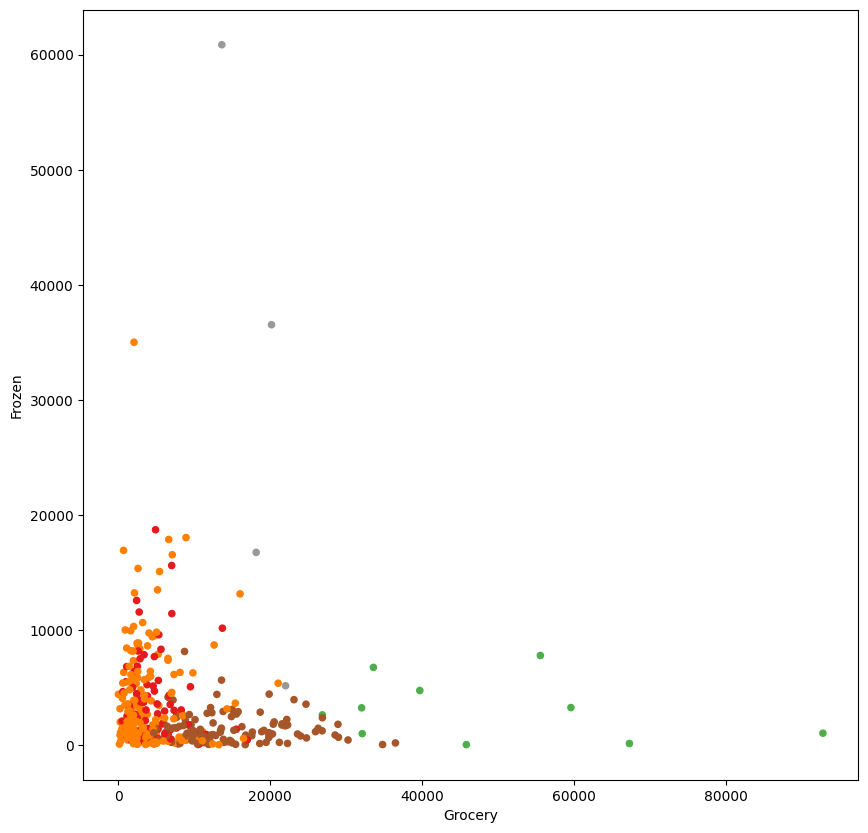

In [92]:
# 결과 시각화
df_ws.plot(kind='scatter', x='Grocery', y='Frozen', c='Cluster', cmap='Set1', colorbar=False, figsize=[10, 10])